In [45]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt
import upsetplot as usp

In [46]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = ""
config_filename = "config_all_3files.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

var = "per_user_id"
#var = "per_user_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["plots"]["input"][var]
dataset_labels = IO_json["plots"]["dataset_labels"]
output = IO_json["plots"]["upsetplot_output"][var]

cols = []
for ds in dataset_labels:
    if "comment" in ds: continue
    cols.append(dataset_labels[ds])
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS-Uploader)']


In [47]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
for i in range(3):
    df[cols[i]] = ~pd.isna(df[f"user_id_{i+1}"])

df1 = df[cols]


In [48]:

df2 = usp.from_indicators(df1)
print(df2)


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
True          False          False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                             False                       1.0
                                                        ... 
False         False          True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
                             True                        1.0
Name: ones, Length: 188, dtype: float64


created image: /home/reinhold/Daten/OPEN/upsetplot_per_user_id.png


<Figure size 1080x1080 with 0 Axes>

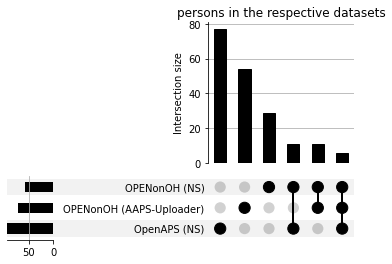

In [49]:
plt.rcParams["font.size"] = 10.0
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.figure(figsize=(15,15))
plt.tight_layout()
usp.plot(df2, subset_size='count')
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")



In [50]:
# upset = usp.UpSet(df2, subset_size='count', intersection_plot_elements=3)
# upset.plot()
#upset.add_catplot(value='median_value', kind='strip', color='blue')
#upset.add_catplot(value='AGE', kind='strip', color='black')


In [51]:
# for venn3 diagramm
output = IO_json["plots"]["venn3_output"][var]
df_v1 = df2.groupby(cols, dropna=False).agg("count")
print(df_v1)
#print(type(df_v1))
#df_v1.info()


OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
False         False          True                        54
              True           False                       29
                             True                        11
True          False          False                       77
              True           False                       11
                             True                         6
Name: ones, dtype: int64


(False, False, True) 54
(False, True, False) 29
(False, True, True) 11
(True, False, False) 77
(True, True, False) 11
(True, True, True) 6
created image: /home/reinhold/Daten/OPEN/venn3_per_user_id.png


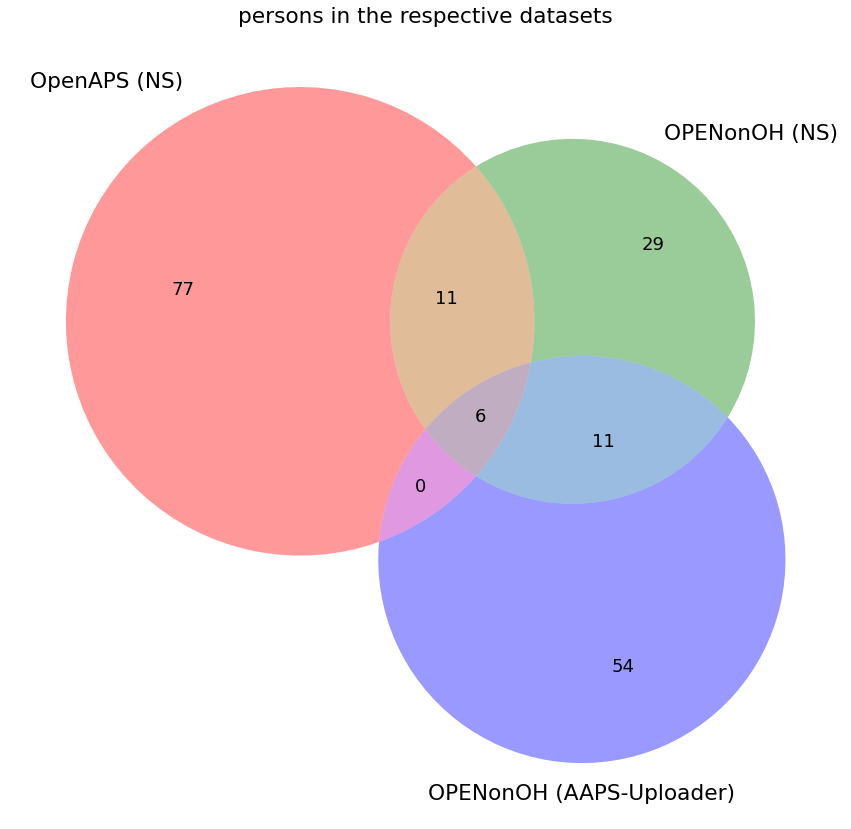

In [52]:
#print(df_v1.index)
#print(df_v1.index.names)
plt.rcParams["font.size"] = 18.0  # 10 by default
data = {}
for i in df_v1.index:
    print(i, df_v1.loc[i])
    i_str = "".join([str(int(i_k)) for i_k in i])
    data[i_str] = df_v1.loc[i]

plt.figure(figsize=(15,15))
plt.tight_layout()
venn3(subsets = data, set_labels=df_v1.index.names)
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")

#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)

In [53]:
# just for cross check
df4 = df1[(df1[cols[0]]==True) & (df1[cols[1]]==True) & (df1[cols[2]]==True)]
print(df4)

     OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS-Uploader)
121          True           True                      True
120          True           True                      True
122          True           True                      True
119          True           True                      True
118          True           True                      True
117          True           True                      True
